In [1]:
!pip install matplotlib wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install -U spacy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import os
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from tabulate import tabulate
from collections import Counter
from wordcloud import WordCloud


In [6]:
!python -m spacy download es_core_news_lg
     

In [27]:
nlp = spacy.load("es_core_news_lg")

In [10]:
pw = 'C:\\Users\\R5-3500U\\Downloads\\30 years war.txt'
nw = 'C:\\Users\\R5-3500U\\Downloads\\Napoleonic wars.txt'

In [11]:
with open(pw, 'r', encoding='utf-8') as f:
    pwb = f.read()

with open(nw, 'r', encoding='utf-8') as f:
    nwb = f.read()

In [ ]:
# Cantidad de caracteres

print(f"Largo texto Guerra de los 30 años: {len(pwb)} caracteres")
print(f"Largo texto Guerras Napoleonicas: {len(nwb)} caracteres")

Longitud texto Guerra de los 30 años: 252566 caracteres
Longitud texto Guerras Napoleonicas: 47854 caracteres


In [14]:
##Normalización 

def tm(texto):
    texto = re.sub(r'<[^>]+>', ' ', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', ' ', texto)
    texto = texto.lower()
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F" 
        "\U0001F300-\U0001F5FF"  
        "\U0001F680-\U0001F6FF"  
        "\U0001F1E0-\U0001F1FF" 
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    texto = emoji_pattern.sub(r' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto


In [ ]:
# Normalización aplicada
pwn = tm(pwb)
nwn = tm(nwb)

print("Primeros 1000 caracteres de la Guerra de los 30 años:")
print(pwn[:1000])
print("\nPrimeros 1000 caracteres de las Guerras Napoleonicas:")
print(nwn[:1000])

Primeros 1000 caracteres de la Guerra de los 30 años:
la guerra de los treinta años fue una guerra librada en la europa central (principalmente el sacro imperio romano germánico) entre los años 1618 y 1648, en la que intervinieron la mayoría de las grandes potencias europeas de la época. esta guerra marcó el futuro del conjunto de europa en los siglos posteriores.[25]​[26]​ aunque inicialmente se trataba de un conflicto político-religioso entre estados partidarios de la reforma y la contrarreforma dentro del propio sacro imperio romano germánico, la intervención paulatina de las distintas potencias europeas convirtió gradualmente el conflicto en una guerra general por toda europa, por razones no necesariamente relacionadas con la religión:[27]​ búsqueda de una situación de equilibrio político, alcanzar la hegemonía en el escenario europeo, enfrentamiento con una potencia rival, etc. la guerra de los treinta años llegó a su final con la paz de westfalia y la paz de los pirineos, y supus

In [19]:
##Descripcción y comparación

# Análisis Guerra de los 30 años

#Parrafos
ppw = pwb.split('\n\n')
npp = len(ppw)
# Frases
fpw = re.split(r'[.!?]+', pwb)
nfp = len([f for f in fpw if len(f.strip()) > 0])
# Palabras
plp = pwn.split()
nlp = len(plp)

# Análisis Guerras Napoleónicas

#Parrafos
pnw = nwb.split('\n\n')
npn = len(pnw)
# Frases
fnw = re.split(r'[.!?]+', nwb)
nfn = len([f for f in fnw if len(f.strip()) > 0])
# Palabras
pln = nwn.split()
npw = len(pln)


In [ ]:
##Largo de frases

lfp = nlp / nfp if nfp > 0 else 0
lfn = npw / nfn if nfn > 0 else 0

In [21]:
print("##  Comparación Estadística de Textos")
print("---------------------------------------------------------------------")

# Formato de la tabla usando tabulate para mejor presentación
datos = [
    ["Párrafos", npp, npn],
    ["Frases", nfp, nfn],
    ["Palabras", nlp, npw],
    ["Pal/Frase (Long. Media)", f"{lfp:.2f}", f"{lfn:.2f}"]
]

headers = ["Métrica", "Guerra 30 años", "Guerras Napoleónicas"]
print(tabulate(datos, headers=headers, tablefmt="fancy_grid"))

print("\n---  Reflexión Breve sobre Longitud y Complejidad ---\n")
##### Regresor de las variables
# Reflexión sobre Longitud
longitud_mayor = "Guerra de los 30 años" if nlp > npw else "Guerras Napoleonicas"
longitud_diferencia = abs(nlp - npw)

print(f"**Longitud General:** El texto de **{longitud_mayor}** es más extenso, contando con {max(nlp, npw)} palabras. La diferencia en la cantidad total de palabras es de {longitud_diferencia}.")

# Reflexión sobre Complejidad (Longitud Media de Frase)
complejidad_mayor = "Guerra de los 30 años" if nfp > nfn else "Guerras Napoleonicas"
largo_mayor = max(nfn, nfp)
largo_menor = min(nfn, nfp)

print(f"\n**Complejidad y Estilo:** El texto de **{complejidad_mayor}** muestra una mayor **complejidad sintáctica**, ya que sus frases tienen un promedio de **{largo_mayor:.2f} palabras/frase**, en comparación con {largo_menor:.2f} palabras/frase del otro texto.")
print("Esto puede indicar un estilo de redacción más denso, con mayor uso de oraciones suordinadas o enumeraciones, mientras que el otro texto tendería a un estilo más directo o segmentado.")

##  Comparación Estadística de Textos
---------------------------------------------------------------------
╒═════════════════════════╤══════════════════╤════════════════════════╕
│ Métrica                 │   Guerra 30 años │   Guerras Napoleónicas │
╞═════════════════════════╪══════════════════╪════════════════════════╡
│ Párrafos                │           173    │                  68    │
├─────────────────────────┼──────────────────┼────────────────────────┤
│ Frases                  │          1490    │                 294    │
├─────────────────────────┼──────────────────┼────────────────────────┤
│ Palabras                │         40657    │                7870    │
├─────────────────────────┼──────────────────┼────────────────────────┤
│ Pal/Frase (Long. Media) │            27.29 │                  26.77 │
╘═════════════════════════╧══════════════════╧════════════════════════╛

---  Reflexión Breve sobre Longitud y Complejidad ---

**Longitud General:** El texto de **Guerra d

In [28]:
#Procesamiento Spacy y palabraas 

doc_pwn = nlp(pwn)
doc_nwn = nlp(nwn)

In [31]:


lemas_pw = [
    token.lemma_.lower() 
    for token in doc_pwn
    if not token.is_stop
    and not token.is_punct 
    and token.is_alpha
]
lemas_nw = [
    token.lemma_.lower() 
    for token in doc_nwn
    if not token.is_stop
    and not token.is_punct 
    and token.is_alpha
]   

frec_pw = Counter(lemas_pw)
frec_nw = Counter(lemas_nw)

In [32]:
print("\n" + "="*50)
print("🇵🇪 Palabras Más Frecuentes (Guerra de los 30 Años) - Núcleo Temático")
print("="*50)
print(frec_pw.most_common(20))

print("\n" + "="*50)
print("🇨🇴 Palabras Más Frecuentes (Guerras Napoleonicas) - Núcleo Temático")
print("="*50)
print(frec_nw.most_common(20))


🇵🇪 Palabras Más Frecuentes (Guerra de los 30 Años) - Núcleo Temático
[('guerra', 358), ('español', 180), ('francia', 153), ('ejército', 152), ('año', 148), ('imperio', 127), ('francés', 126), ('españa', 123), ('protestante', 121), ('país', 113), ('católico', 113), ('paz', 109), ('habsburgo', 108), ('sueco', 108), ('suecia', 99), ('batalla', 96), ('emperador', 92), ('holandés', 88), ('rey', 87), ('imperial', 85)]

🇨🇴 Palabras Más Frecuentes (Guerras Napoleonicas) - Núcleo Temático
[('napoleón', 103), ('guerra', 86), ('ejército', 85), ('francés', 73), ('batalla', 51), ('francia', 44), ('reino', 39), ('coalición', 38), ('aliado', 33), ('británico', 31), ('unido', 28), ('fuerza', 28), ('austria', 25), ('ruso', 24), ('hombre', 23), ('rusia', 22), ('victoria', 18), ('tratado', 17), ('mando', 16), ('paz', 16)]


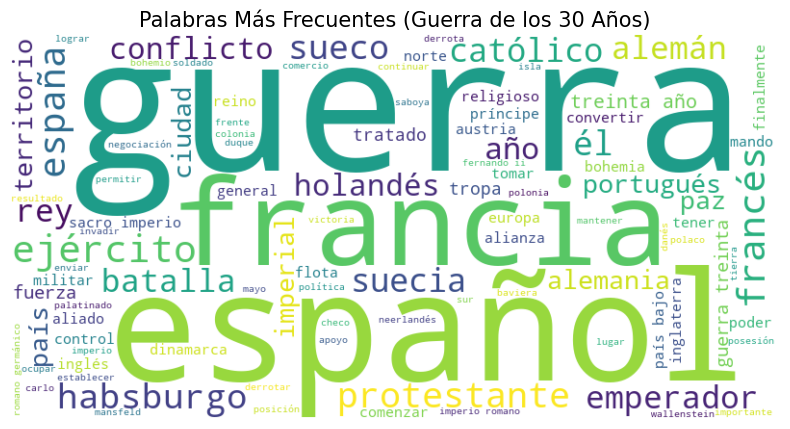

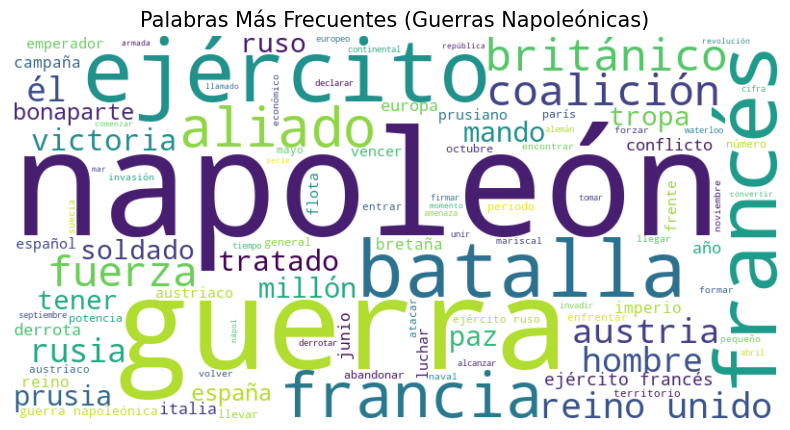

In [36]:
texto_lemas_pw = " ".join(lemas_pw)
texto_lemas_nw = " ".join(lemas_nw)

wc_pw = WordCloud(
    width=800, 
    height=400, 
    max_words=100, 
    background_color='white'
).generate(texto_lemas_pw)


# Configuración y generación de la nube para el segundo texto
wc_nw = WordCloud(
    width=800, 
    height=400, 
    max_words=100, 
    background_color='white'
).generate(texto_lemas_nw)

# Nube de Palabras para la Guerra de los 30 años
plt.figure(figsize=(10, 5))
plt.imshow(wc_pw, interpolation='bilinear')
plt.title('Palabras Más Frecuentes (Guerra de los 30 Años)', fontsize=15)
plt.axis('off')
plt.show()

# Nube de Palabras para las Guerras Napoleónicas
plt.figure(figsize=(10, 5))
plt.imshow(wc_nw, interpolation='bilinear')
plt.title('Palabras Más Frecuentes (Guerras Napoleónicas)', fontsize=15)
plt.axis('off')
plt.show()

##*Interpretación*##

Al encontrar todas las palabras raiz dentro de los textos, podemos observar con detenimiento una sombra de los sucesos descritos por cada texto con bastante detalle

En un lado tenemos las Guerras Napoleonicas, donde un individuo se levanto entre grandes imperios, destacando sobre todos con su ingenio inigualable en la batalla y revolucionando tanto el arte de la guerra como la politica y la administración, el texto se centra en este gran individuo "Napoleon" y su camino para enfrentarse a otras naciones

Por otra parte, tenemos la Guerra de los 30 años, un suceso que va mas alla del conflicto y de lo politico, los imperios mas grandes del momento chocaron con fuerza monumental, todo por lo que se creia correcto y moral (con respecto a la religion ), uno de los conflictos que se pasan mas desapercibidos y que no reciben la atencion que merecen con respecto a su relevancia historica

In [ ]:
#Etiquetado gramatical

def extraer_pos(doc, pos_tags):
    lemas_pos = [
        token.lemma_.lower() for token in doc
        if token.pos_ in pos_tags
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and len(token.lemma_) > 2
    ]
    return lemas_pos

In [38]:

sustantivos_nwn = extraer_pos(doc_nwn, ['NOUN'])
sustantivos_pwn = extraer_pos(doc_pwn, ['NOUN'])

verbos_nwn = extraer_pos(doc_nwn, ['VERB'])
verbos_pwn = extraer_pos(doc_pwn, ['VERB'])

adjetivos_nwn = extraer_pos(doc_nwn, ['ADJ'])
adjetivos_pwn = extraer_pos(doc_pwn, ['ADJ'])


print("\nGuerra de los 30 años: Sustantivos más frecuentes:")
print(Counter(sustantivos_nwn).most_common(10))
print("\nGuerra de los 30 años: Verbos más frecuentes:")
print(Counter(verbos_nwn).most_common(10))
print("\nGuerra de los 30 años: Adjetivos más frecuentes:")
print(Counter(adjetivos_nwn).most_common(10))

print("\nGuerras Napoleonicas: Sustantivos más frecuentes:")
print(Counter(sustantivos_pwn).most_common(10))
print("\nGuerras Napoleonicas: Verbos más frecuentes:")
print(Counter(verbos_pwn).most_common(10))
print("\nGuerras Napoleonicas: Adjetivos más frecuentes:")
print(Counter(adjetivos_pwn).most_common(10))


Guerra de los 30 años: Sustantivos más frecuentes:
[('guerra', 86), ('napoleón', 85), ('ejército', 85), ('batalla', 51), ('coalición', 38), ('fuerza', 28), ('hombre', 23), ('aliado', 20), ('victoria', 18), ('mando', 16)]

Guerra de los 30 años: Verbos más frecuentes:
[('tener', 15), ('vencer', 11), ('luchar', 11), ('ver', 10), ('abandonar', 10), ('entrar', 9), ('llevar', 9), ('atacar', 9), ('formar', 8), ('forzar', 8)]

Guerra de los 30 años: Adjetivos más frecuentes:
[('francés', 57), ('británico', 26), ('ruso', 20), ('continental', 13), ('aliado', 13), ('napoleónica', 11), ('español', 9), ('económico', 8), ('naval', 8), ('pequeño', 8)]

Guerras Napoleonicas: Sustantivos más frecuentes:
[('guerra', 356), ('ejército', 152), ('año', 148), ('imperio', 123), ('país', 113), ('paz', 109), ('habsburgo', 102), ('batalla', 96), ('emperador', 92), ('tropa', 72)]

Guerras Napoleonicas: Verbos más frecuentes:
[('convertir', 48), ('tomar', 44), ('comenzar', 42), ('derrotar', 41), ('tener', 36), (

In [41]:
def obtener_lemas(doc):
    lemas = [
        token.lemma_.lower() for token in doc
        if not token.is_stop
        and not token.is_punct 
        and not token.is_space
        and len(token.lemma_) > 2
    ] 
    return lemas

In [ ]:
lemas_pwn = obtener_lemas(doc_pwn)
lemas_nwn = obtener_lemas(doc_nwn)


freq_pwn = Counter(lemas_pwn)
freq_nwn = Counter(lemas_nwn)

print("--- 20 Lemas más frecuentes (Guerra de los 30 años) ---")
print(freq_pwn.most_common(20))
print("\n--- 20 Lemas más frecuentes (Guerras Napoleonicas) ---")
print(freq_nwn.most_common(20))

--- 20 Lemas más frecuentes (Guerra de los 30 años) ---
[('guerra', 358), ('español', 180), ('francia', 153), ('ejército', 152), ('año', 148), ('imperio', 127), ('francés', 126), ('españa', 123), ('protestante', 121), ('país', 113), ('católico', 113), ('paz', 109), ('habsburgo', 108), ('sueco', 108), ('suecia', 99), ('batalla', 96), ('emperador', 92), ('holandés', 88), ('rey', 87), ('imperial', 85)]

--- 20 Lemas más frecuentes (Guerras Napoleonicas) ---
[('napoleón', 103), ('guerra', 86), ('ejército', 85), ('francés', 73), ('000', 57), ('batalla', 51), ('francia', 44), ('reino', 39), ('coalición', 38), ('aliado', 33), ('británico', 31), ('unido', 28), ('fuerza', 28), ('austria', 25), ('ruso', 24), ('hombre', 23), ('rusia', 22), ('victoria', 18), ('tratado', 17), ('mando', 16)]


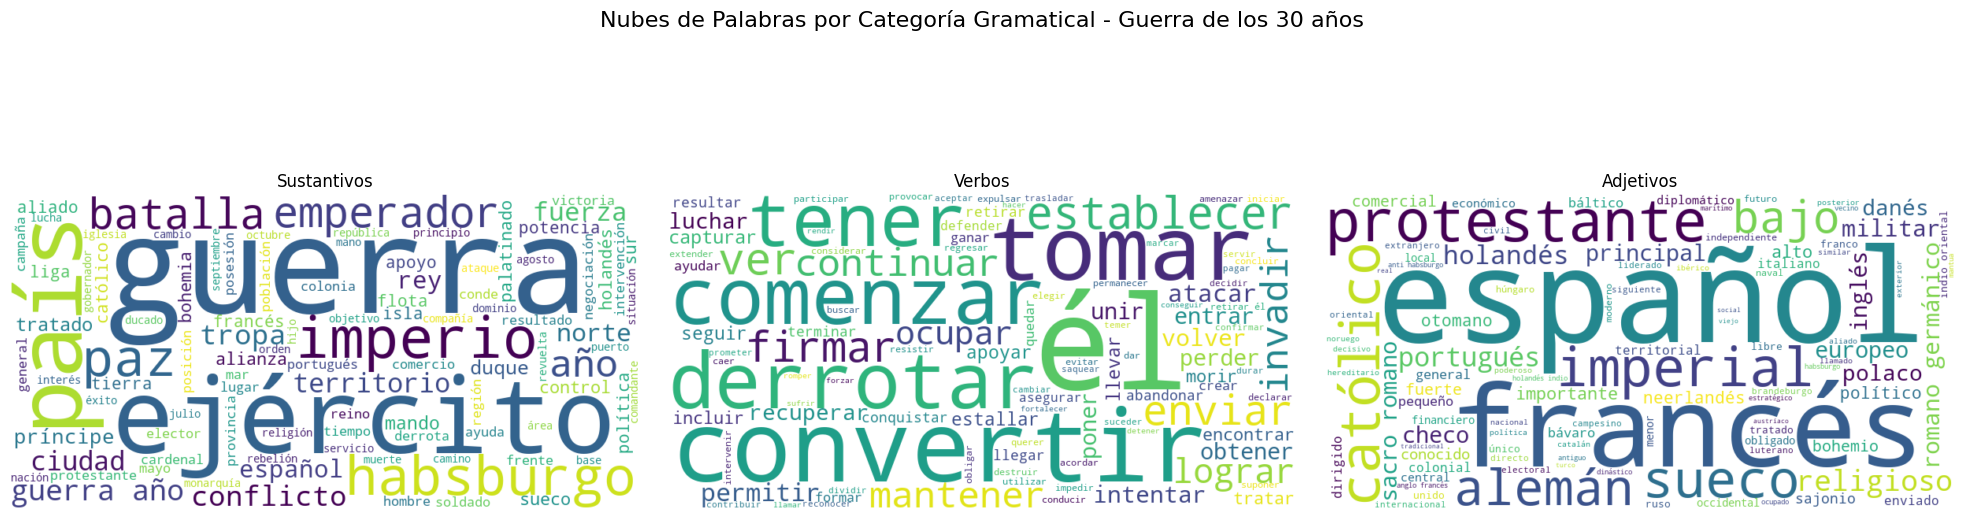

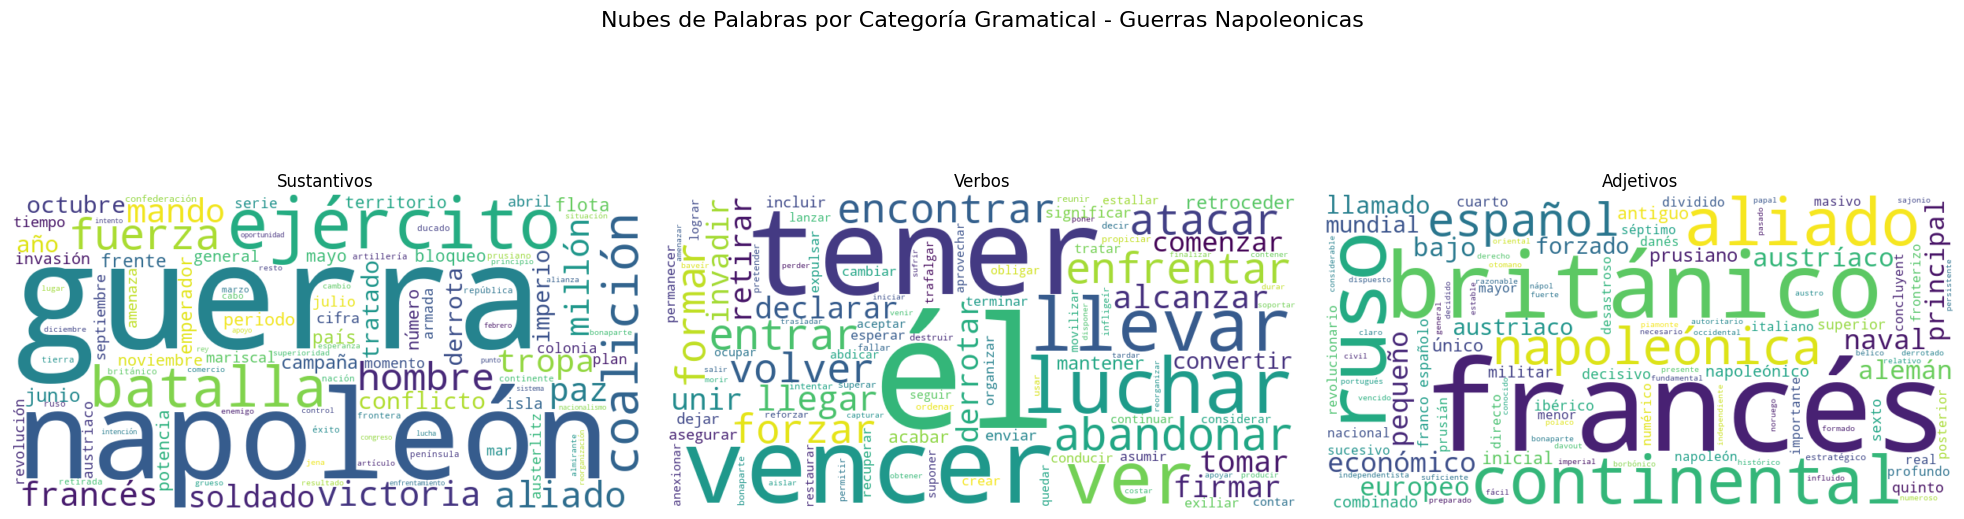

In [43]:
def plot_wordcloud_pos(text_dict, title_prefix):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    categories = ['Sustantivos', 'Verbos', 'Adjetivos']
    
    
    dict_keys = ['NOUN', 'VERB', 'ADJ']
    
    for i, (cat, key) in enumerate(zip(categories, dict_keys)):
        if not text_dict[key]:
            print(f"No hay suficientes datos para la nube de {cat} en {title_prefix}")
            axes[i].text(0.5, 0.5, 'No hay datos', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{cat}')
            axes[i].axis('off')
            continue
            
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=100,
            contour_width=3,
            contour_color='steelblue',
            stopwords=None 
        )
        
        
        wc.generate(" ".join(text_dict[key]))
        
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'{cat}')
        axes[i].axis('off')
        
        plt.suptitle(f'Nubes de Palabras por Categoría Gramatical - {title_prefix}', fontsize=16, y=1.03)
    plt.tight_layout(pad=2.0)
    plt.show()

pos_pwn_dict = {
    'NOUN': sustantivos_pwn,
    'VERB': verbos_pwn,
    'ADJ': adjetivos_pwn
}
plot_wordcloud_pos(pos_pwn_dict, "Guerra de los 30 años")
pos_nwn_dict = {
    'NOUN': sustantivos_nwn,
    'VERB': verbos_nwn,
    'ADJ': adjetivos_nwn
}
plot_wordcloud_pos(pos_nwn_dict, "Guerras Napoleonicas")

##*Interpretación*##

Sustantivos:
En ambos casos los sustantivos nos muestran el corazón y la razón de ambos conflictos, sus participantes, sus familias y todo a lo que conllevaron, llamense protrstsntes, Hasburgos o Napoleon

Verbos:
En mabso casis los verbos podemos ver como la mayotia tienen que ver con posecion, tener, llevar, tomar, controlar, e.t.c, con pequeñas distinciones según cada contexto como el "convertir" en el contexto de la guerra de los 30 años y sus conflixtos Catolico/Protestantes o el "declarar" en el contexto de las revoluciones burguesas de ese siglo

Adjetivos:
Podemos observar como en los adjetivos nos encontramos los principales contendientes de estos conflictos, muy particularmente como "Frances" mantinee la relevancia meintras que los Españoles pierden muchisimo protagonismo comparado con la guerra de los 30 años, demostrando como la potencia española decallo posterior a la guerra de los 30 años, ademas de la muy interesante perdida del componente religioso en pos de uno politico, muy comun durante el siglo en el cual se consolidaria el concepto de "Estado Nación"

In [44]:
##SVO##

def svo(doc):
    tripletas = []

    for token in doc:
        if token.pos_ == 'VERB' and token.dep_ != 'aux':
            
            sujetos = []
            objetos = []

            # 1. Buscar Sujetos
            for t in token.children:
                if t.dep_ in ('nsubj', 'nsubj:pass'):
                    sujetos.append(t.lemma_)
            for t in token.children:
                if t.dep_ in ('dobj', 'obj', 'obl'):
                    objetos.append(t.lemma_)

            if sujetos and objetos:
                verbo = token.lemma_
                for s in sujetos:
                    for o in objetos:
                        tripletas.append((s, verbo, o))
                         
                        return tripletas


svo_pwn = svo(doc_pwn)
svo_nwn = svo(doc_nwn)

print(f"\nSe encontraron {len(svo_pwn)} tripletas SVO en el documento de la Guerra de los 30 Años.")
print("Ejemplos SVO (Guerra de los 30 Años) - Más comunes:")
print(Counter(svo_pwn).most_common(15))

print(f"\nSe encontraron {len(svo_nwn)} tripletas SVO en el documento de las Guerras Napoleonicas.")
print("Ejemplos SVO (Guerras Napoleonicas) - Más comunes:")
print(Counter(svo_nwn).most_common(15))



Se encontraron 1 tripletas SVO en el documento de la Guerra de los 30 Años.
Ejemplos SVO (Guerra de los 30 Años) - Más comunes:
[(('guerra', 'marcar', 'futuro'), 1)]

Se encontraron 1 tripletas SVO en el documento de las Guerras Napoleonicas.
Ejemplos SVO (Guerras Napoleonicas) - Más comunes:
[(('que', 'tener', 'imperio'), 1)]


##*Interpretación*##

Desde el lado de la guerra de los 30 años se puede observar el como este conflicto pudo marcar de manera permanente como cambiaria la politica y diplomacio en europa

Mientras que del lado de las guerras napoleonicas, podemos interpretar el como se presenta tan fuertemente la idea de "Poseción", el como Napoleon se esforzó para imponerse a tantos otros imperios e imponer a Francia como el imperio mayor a su cabeza 

##*Conclusión*##

En el ambos textos podemos observar como ambos conflictos estuvieron llenos de gran complegidad, con solo un vistazo a cosas esenciales y palabras sueltas pudimos darnos cuenta de como cada texto muestra la complejidad de cada conflicto, desde los conflicos eclesiasticos y politicos propios de la guerra de los 30 años, hasta los conflictos que darían nacimiento al estado nacion moderno en las guerras napoleonicas

Podemos asociar los sucesos de la guerra de los 30 años con una complejidad mayor, a que se debe?, para el siglo XIX en el cual se llevo la gran mayoria de los conflictos napoleonicos europa no estaba tan dividida, esta ya tenia grandes bloques completamente consolidados y el que es mas interesante para esto son los territorios del sacro imperio romano germanico (actual Alemania, Austria, Italia, Suiza, Polonia, francia, luxemburgo y Republica Checa), estaba completamente alineado con los intereses Austriacos y prusianos, comparablemente la guerra de los 30 años sucedio interamente en tierras del sacro imperio romano germanico, enfrentando pequeños y grandes principados, con intervenciones de grandes potencias del momento (Inglaterra, España, Francia, Polonia, Dinamarca y Suecia), su complejidad se asocia a que el conflicto se vivio en diferentes niveles de la sociedad, ya que el conflicto no era solo politico si no tambien religioso, creando una serie de conflictos que tocarian toda europa 

Las principales palabras que podemos ver implican mucho del contexto del momento, lo religioso del siglo XVII y lo politico del siglo XIX, podemos destacar la perdida de la relevancia del factor religioso, el cual se debe justamente a una lenta separacion de poderes impulsada por el final del conflicto de la guerra de los 30 años en la paz de Westfalia, justamente la subida de los reyes y emperadores al poder absoluto que tanto deeaban termino en las revoluciones francesas del siglo XVIII las cuales llevaron a Napoleon al poder, lo cual significaria el final de la aristocracia en pos de la burguesia, bajo este contexto, podemos decir que los verbos de posecion que mencionamos antes, tenian un significado completamente distinto, mientras que en la guerra de los 30 años podemos hablar de una toma no solo de tierra, si no tambien de las almas de quienes viven alli, lo que para muchos significaba en ese momento ir al cielo o al infierno, mientras que por otro lado, en las guerras napoleonicas, hababamos de una toma simbolica del poder, con la tierra como eje central, pero tambien con la libertad "Ilustrada" que representaba Napoleon en oposición a la nobleza dominante

Al final de dia ninguno de los dos conflictos es comparable, mucho menos con un analisis tan superfluo que solo se basa en palabras sueltas y verbos, pero podemos destacar como con esto ya podemos intuir la transformación de europa y su historia, como pasaron de estados con gran influencia eclesiastica a estados modernos y cuya soberania ya no se basaba en una propiedad "divida" heredada de la edad moderna si no a un sentido de pertenencia mas profundo y nacionalista que hemos heredado al dia de hoy 